In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from tensorflow import keras

In [2]:
from scipy.ndimage import gaussian_filter
from scipy import misc
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [3]:
Y = pd.read_csv("labels.csv")

In [4]:
#Shape of the labels
Y.shape

(4750, 1)

In [5]:
#First 5 observations of the labels
Y.head()

,Label
0,Small-flowered Cranesbill
1,Small-flowered Cranesbill
2,Small-flowered Cranesbill
3,Small-flowered Cranesbill
4,Small-flowered Cranesbill


In [6]:
#Unique value counts of the labels
Y.value_counts()

Label                    
Loose Silky-bent             654
Common Chickweed             611
Scentless Mayweed            516
Small-flowered Cranesbill    496
Fat Hen                      475
Charlock                     390
Sugar beet                   385
Cleavers                     287
Black-grass                  263
Shepherds Purse              231
Common wheat                 221
Maize                        221
dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

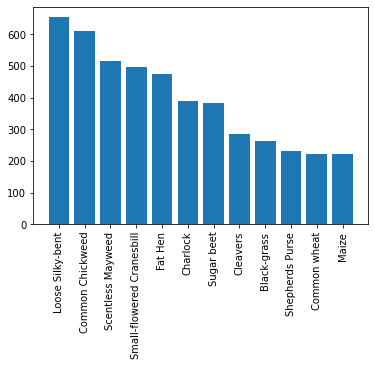

In [7]:
df_val_counts = pd.DataFrame(Y.value_counts())
df_value_counts_reset = df_val_counts.reset_index()
df_value_counts_reset.columns = ['unique_values', 'counts']
plt.bar(data=df_value_counts_reset,x='unique_values',height='counts')
plt.xticks(rotation=90)

In [8]:
#load the images into numpy array
X = np.load('images.npy')

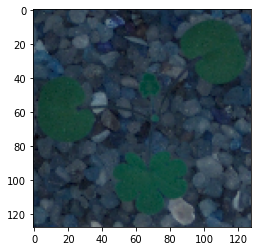

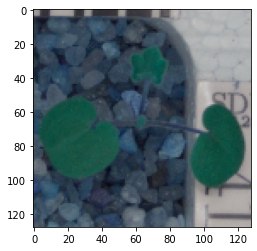

In [9]:
#Visualize the image from the dataset
plt.imshow(X[1])
plt.show()
plt.imshow(X[2])
plt.show()

In [10]:
X.shape

(4750, 128, 128, 3)

In [11]:
#Normalize the data
X = X.astype('float32')
X /= 255

In [12]:
#Confirming the min and max value from X
print(X.shape)
print("Max value in X:", X.max())
print("Min value in X:", X.min())

(4750, 128, 128, 3)
Max value in X: 1.0
Min value in X: 0.0


In [21]:
#Initialize Gaussian Filter
a = np.arange(50, step=2).reshape((5,5))
gaussian_filter(a, sigma=1)

array([[ 4,  6,  8,  9, 11],
       [10, 12, 14, 15, 17],
       [20, 22, 24, 25, 27],
       [29, 31, 33, 34, 36],
       [35, 37, 39, 40, 42]])

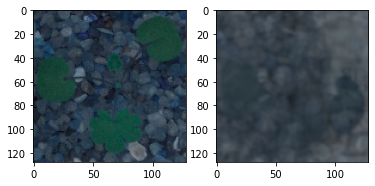

In [14]:
#Applying the filter over the dataset
fig = plt.figure()
plt.gray()  # show the filtered result in grayscale
ax1 = fig.add_subplot(121)  # left side
ax2 = fig.add_subplot(122)  # right side
X_gaus = gaussian_filter(X, sigma=1)
ax1.imshow(X[1])
ax2.imshow(X_gaus[1])
plt.show()

In [18]:
#One hot encoding for Y variable and printing the first observation
Y = pd.get_dummies(Y)
print(Y[0:1])

   Label_Black-grass  Label_Charlock  Label_Cleavers  Label_Common Chickweed  \
0                  0               0               0                       0   

   Label_Common wheat  Label_Fat Hen  Label_Loose Silky-bent  Label_Maize  \
0                   0              0                       0            0   

   Label_Scentless Mayweed  Label_Shepherds Purse  \
0                        0                      0   

   Label_Small-flowered Cranesbill  Label_Sugar beet  
0                                1                 0  


In [19]:
#Split the data in test, train and validation
X_train, X_test, y_train, y_test = train_test_split(X_gaus, Y, test_size=0.3, random_state=1)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=12)

In [17]:
print(X_test.shape)
print(y_test.shape)

(712, 128, 128, 3)
(712, 12)


In [23]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [38]:
model = tf.keras.models.Sequential()

# Input layer
model.add(tf.keras.layers.InputLayer(input_shape=(128,128,3,)))

# Here we add a 2D Convolution layer
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))

# Max Pool layer 
# It downsmaples the input representetion within the pool_size size
model.add(tf.keras.layers.MaxPool2D(pool_size = (2,2)))

# Normalization layer
# The layer normalizes its output using the mean and standard deviation of the current batch of inputs.
model.add(tf.keras.layers.BatchNormalization())

# Dense Layers after flattening the data
model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128, activation='relu'))

# Dropout
# is used to nullify the outputs that are very close to zero and thus can cause overfitting.
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(64, activation='relu'))

# Normalization layer
model.add(tf.keras.layers.BatchNormalization())

#Add Output Layer for 12 predicted classes
model.add(tf.keras.layers.Dense(12, activation='softmax')) 


In [39]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [43]:
 model.fit(x=X_train,y=y_train,epochs=16, # Increase number of epochs if you have sufficient hardware
          batch_size=30,  # Number of train images // batch_size
           # Number of val images // batch_size
          verbose = 1)

Epoch 1/16
111/111 [==============================] - 27s 240ms/step - loss: 0.0217 - accuracy: 0.9940
Epoch 2/16
111/111 [==============================] - 27s 241ms/step - loss: 0.0159 - accuracy: 0.9964
Epoch 3/16
111/111 [==============================] - 27s 241ms/step - loss: 0.0150 - accuracy: 0.9961
Epoch 4/16
111/111 [==============================] - 27s 242ms/step - loss: 0.0112 - accuracy: 0.9967
Epoch 5/16
111/111 [==============================] - 1342s 12s/step - loss: 0.0092 - accuracy: 0.9982
Epoch 6/16
111/111 [==============================] - 7246s 66s/step - loss: 0.0048 - accuracy: 1.0000
Epoch 7/16
111/111 [==============================] - 7246s 66s/step - loss: 0.0048 - accuracy: 0.9985
Epoch 8/16
111/111 [==============================] - 2198s 20s/step - loss: 0.0042 - accuracy: 0.9994
Epoch 9/16
111/111 [==============================] - 27s 245ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 10/16
111/111 [==============================] - 26s 238ms/step - l

In [44]:
model.evaluate(X_val,y_val)

23/23 [==============================] - 1s 55ms/step - loss: 0.4214 - accuracy: 0.8612


[0.4213990569114685, 0.8611500859260559]

In [45]:
model.evaluate(X_test,y_test)

23/23 [==============================] - 1s 55ms/step - loss: 0.4826 - accuracy: 0.8371


[0.4825859069824219, 0.8370786309242249]

Predicted label: 4
Softmax Outputs: [[3.1462407e-03 4.2637382e-04 3.6232129e-03 1.3072844e-04 3.8636902e-01
  8.8548506e-05 9.7026452e-03 1.0279109e-03 3.8247088e-01 2.5280079e-04
  2.4425663e-05 2.1273726e-01]]


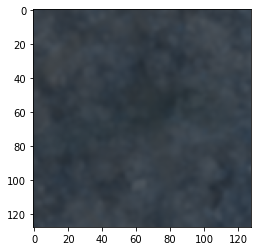

Predicted label: 5
Softmax Outputs: [[2.5160038e-03 1.3465316e-04 5.4611114e-04 3.5746821e-04 3.1613169e-04
  9.6233666e-01 1.4239241e-04 7.1871611e-05 2.5629264e-04 4.3553067e-05
  1.1166036e-04 3.3167116e-02]]


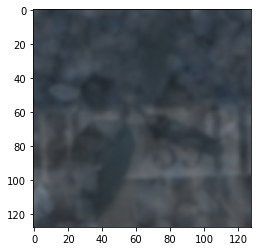

Predicted label: 1
Softmax Outputs: [[2.29204795e-03 9.00139034e-01 3.67054978e-04 7.01323443e-04
  2.49353499e-04 1.38694495e-05 3.50778311e-04 1.72443644e-04
  7.59748816e-02 1.62621465e-04 3.74524971e-04 1.92020312e-02]]


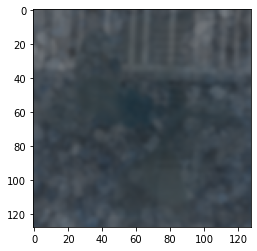

Predicted label: 3
Softmax Outputs: [[3.3447985e-04 1.7723977e-04 8.4713583e-06 5.5797732e-01 2.4611587e-04
  1.8200830e-05 3.0559735e-04 9.9594453e-03 8.5862132e-04 1.6894282e-04
  6.1526473e-05 4.2988408e-01]]


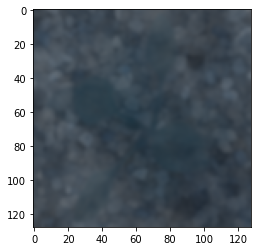

Predicted label: 11
Softmax Outputs: [[1.0807676e-03 1.5321938e-02 1.3372619e-03 9.6310815e-04 2.8634460e-03
  3.9639862e-04 9.5934793e-04 2.6551380e-03 1.1089796e-02 1.5767123e-01
  1.5174181e-04 8.0550981e-01]]


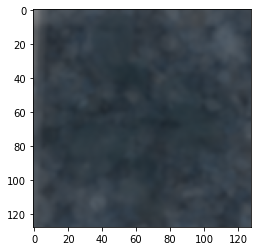

In [69]:
for num in [2,3,33,36,59]:
    y_pred = model.predict(X_test[num].reshape(1, 128, 128, 3))
    print("Predicted label:", y_pred.argmax())
    print("Softmax Outputs:", y_pred)
    plt.imshow(X_test[num], cmap='gray')
    plt.show()